In [1]:
import numpy as np
import pandas as pd
import robi

%load_ext autoreload
%autoreload 2

df = pd.read_csv('../data/DLBCL_test.csv')
candidates = ['TMTV', 'Dmax']

In [2]:
n_workers=7
n_random=1e4
n_permut_nfp=10

n_fakes = 1000

device='cuda'

In [3]:
df_random = pd.DataFrame(data=np.random.uniform(0,1, (df.shape[0], int(n_fakes))), index=df.index)
df_random.columns = df_random.columns.astype('str')
random_cols = df_random.columns
df = pd.concat([df, df_random], axis=1)
candidates = ['TMTV', 'Dmax']+random_cols.tolist()

# Can it find TMTV and Dmax ?

Selection started...

Verifying confounders settings...
Confounders follow proportional hazard assumptions

Starting pre-selection
1002 candidates remain after dropping candidates with NaNs.
1002 candidates remain after dropping constant candidates.
1002 candidates remain after dropping candidates with low variance.


2023-09-04 15:20:14,377	INFO worker.py:1621 -- Started a local Ray instance.


1002 candidates remain after dropping candidates sensitive to confounders.
1002 candidates remain after dropping duplicated candidates.


C:\Users\louis\miniconda3\envs\robi\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Computing scores of permutations: 100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


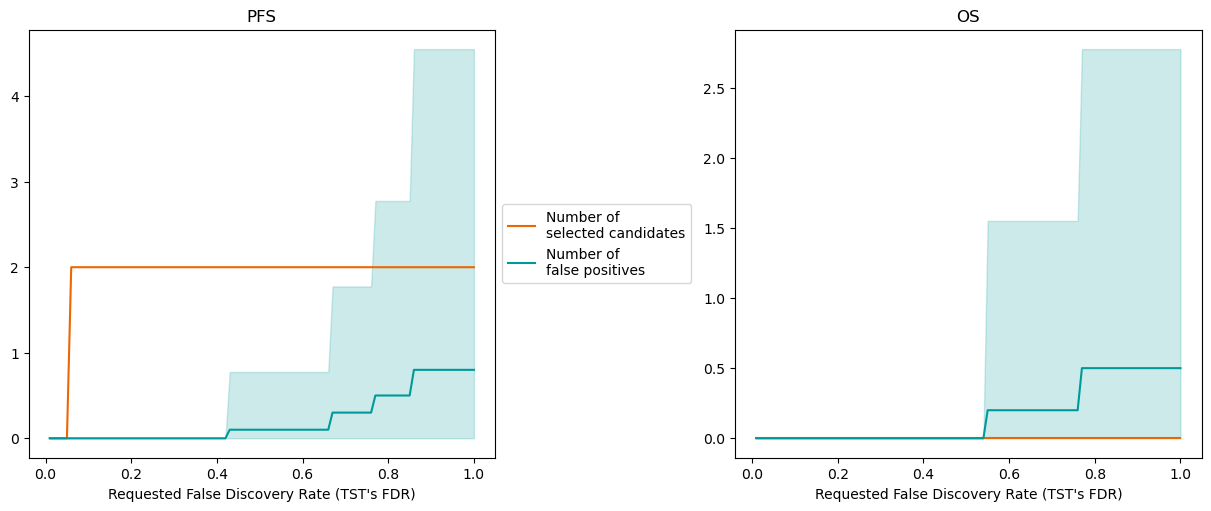

sel_OS                  []
n_sel_OS                 0
sel_PFS       [TMTV, Dmax]
n_sel_PFS                2
n_fp_PFS     0.0 (0.0-0.0)
n_fp_OS      0.0 (0.0-0.0)
Name: 0.06, dtype: object

In [4]:
res,_ = robi.make_selection(df,
                    candidates=candidates,
                    targets = {
                      'PFS': ('PFS_months', 'PFS_event_happened'),
                      'OS': ('OS_months', 'OS_event_happened'),
                    },
                    confounders = ['ECOG', 'aaIPI', 'treatment', 'sex'],
                    strata = ['treatment'],
                    n_workers=n_workers,
                    n_random=n_random,
                    n_permut_nfp=n_permut_nfp,
                    verbose=True,
                    device=device)
res[res['n_sel_PFS']>0].iloc[0]

# Can it find Dmax witht TMTV as confounders ?

Selection started...

Verifying confounders settings...
Confounders follow proportional hazard assumptions

Starting pre-selection
1002 candidates remain after dropping candidates with NaNs.
1002 candidates remain after dropping constant candidates.
1002 candidates remain after dropping candidates with low variance.
999 candidates remain after dropping candidates sensitive to confounders.
999 candidates remain after dropping duplicated candidates.


Computing scores of permutations: 100%|██████████| 10/10 [00:00<00:00, 12.23it/s]


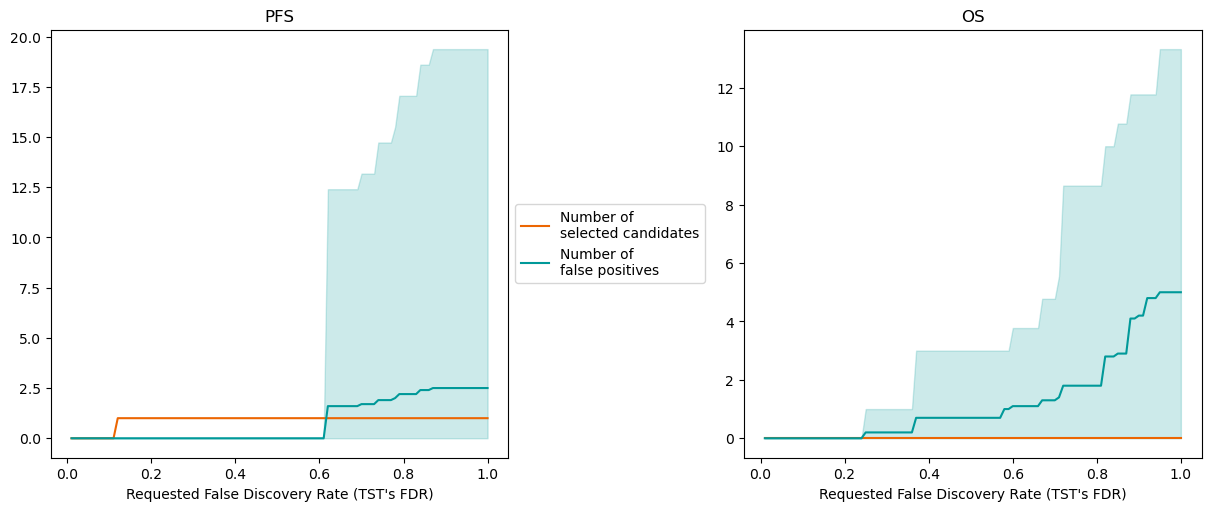

sel_OS                  []
n_sel_OS                 0
sel_PFS             [Dmax]
n_sel_PFS                1
n_fp_PFS     0.0 (0.0-0.0)
n_fp_OS      0.0 (0.0-0.0)
Name: 0.12, dtype: object

In [5]:
res,_ = robi.make_selection(df,
                    candidates=candidates,
                    targets = {
                      'PFS': ('PFS_months', 'PFS_event_happened'),
                      'OS': ('OS_months', 'OS_event_happened'),
                    },
                    confounders = ['TMTV', 'ECOG', 'aaIPI', 'treatment', 'sex'],
                    strata = ['treatment'],
                    n_workers=n_workers,
                    n_random=n_random,
                    n_permut_nfp=n_permut_nfp,
                    verbose=True,
                    device=device)
res[res['n_sel_PFS']>0].iloc[0]

# Does it pick fake features ?

Selection started...

Verifying confounders settings...
Confounders follow proportional hazard assumptions

Starting pre-selection
1002 candidates remain after dropping candidates with NaNs.
1002 candidates remain after dropping constant candidates.
1002 candidates remain after dropping candidates with low variance.
986 candidates remain after dropping candidates sensitive to confounders.
986 candidates remain after dropping duplicated candidates.
Consider increasing n_random. We recommend at least 1.82E+05 random features.


Computing scores of permutations: 100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


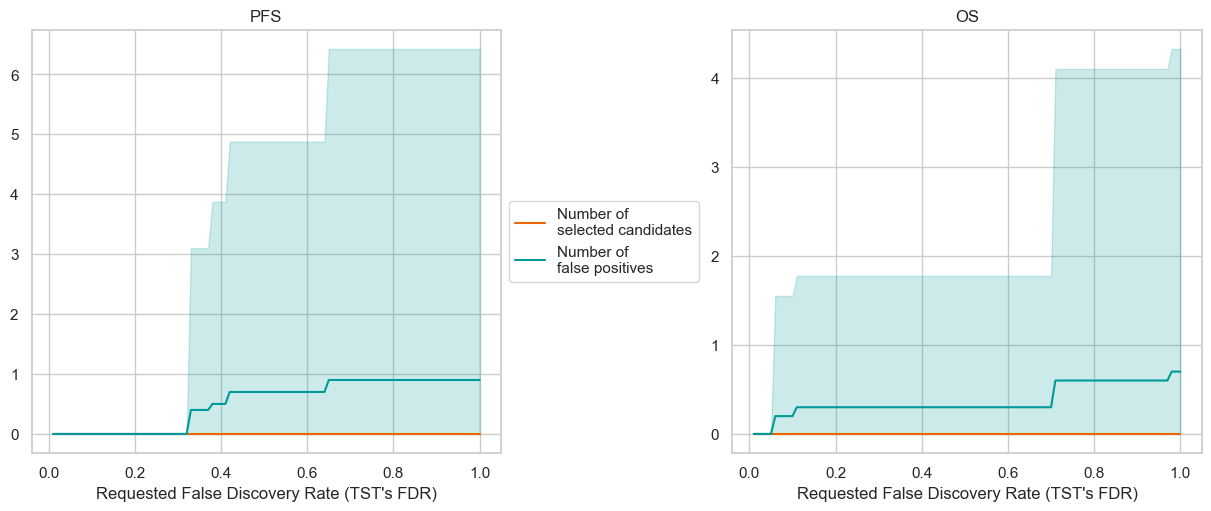

,sel_OS,n_sel_OS,sel_PFS,n_sel_PFS,n_fp_PFS,n_fp_OS
permissiveness,,,,,,


In [6]:
res,_ = robi.make_selection(df,
                    candidates=candidates,
                    targets = {
                      'PFS': ('PFS_months', 'PFS_event_happened'),
                      'OS': ('OS_months', 'OS_event_happened'),
                    },
                    confounders = ['TMTV', 'Dmax', 'ECOG', 'aaIPI', 'treatment', 'sex'],
                    strata = ['treatment'],
                    n_workers=n_workers,
                    n_random=n_random,
                    n_permut_nfp=n_permut_nfp,
                    verbose=True,
                    device=device)
res[res['n_sel_PFS']>0]